In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\ASUS\Downloads\Linkific\weather_data.csv")

print(df)


            Location            Date_Time  Temperature_C  Humidity_pct  \
0          San Diego  2024-01-14 21:12:46      10.683001     41.195754   
1          San Diego  2024-05-17 15:22:10       8.734140     58.319107   
2          San Diego  2024-05-11 09:30:59      11.632436     38.820175   
3       Philadelphia  2024-02-26 17:32:39      -8.628976     54.074474   
4        San Antonio  2024-04-29 13:23:51      39.808213     72.899908   
...              ...                  ...            ...           ...   
999995        Dallas  2024-01-01 20:29:48      23.416877     37.705024   
999996   San Antonio  2024-01-20 15:59:48       6.759080     40.731036   
999997      New York  2024-04-14 08:30:09      15.664465     62.201884   
999998       Chicago  2024-05-12 20:10:43      18.999994     63.703245   
999999      New York  2024-04-16 16:11:52      10.725351     43.804584   

        Precipitation_mm  Wind_Speed_kmh  
0               4.020119        8.233540  
1               9.111623 

In [2]:
df.head(3)

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,San Diego,2024-01-14 21:12:46,10.683001,41.195754,4.020119,8.233540
1,San Diego,2024-05-17 15:22:10,8.734140,58.319107,9.111623,27.715161
2,San Diego,2024-05-11 09:30:59,11.632436,38.820175,4.607511,28.732951


In [4]:
df.isnull().sum()

Location            0
Date_Time           0
Temperature_C       0
Humidity_pct        0
Precipitation_mm    0
Wind_Speed_kmh      0
dtype: int64

Hottest day

In [13]:
df.loc[df["Temperature_C"].idxmax()]

Location                       New York
Date_Time           2024-05-16 14:31:50
Temperature_C                 39.999801
Humidity_pct                  35.418345
Precipitation_mm               6.574819
Wind_Speed_kmh                20.988972
Name: 899115, dtype: object

Coldest day

In [16]:
df.loc[df["Temperature_C"].idxmin()]

Location                        Phoenix
Date_Time           2024-01-12 20:20:14
Temperature_C                -19.969311
Humidity_pct                  52.217649
Precipitation_mm               0.554449
Wind_Speed_kmh                 21.77262
Name: 360894, dtype: object

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Location          1000000 non-null  object 
 1   Date_Time         1000000 non-null  object 
 2   Temperature_C     1000000 non-null  float64
 3   Humidity_pct      1000000 non-null  float64
 4   Precipitation_mm  1000000 non-null  float64
 5   Wind_Speed_kmh    1000000 non-null  float64
dtypes: float64(4), object(2)
memory usage: 45.8+ MB


In [20]:
df["Date_Time"] = pd.to_datetime(df["Date_Time"])


In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Location          1000000 non-null  object        
 1   Date_Time         1000000 non-null  datetime64[ns]
 2   Temperature_C     1000000 non-null  float64       
 3   Humidity_pct      1000000 non-null  float64       
 4   Precipitation_mm  1000000 non-null  float64       
 5   Wind_Speed_kmh    1000000 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 45.8+ MB


In [24]:
df["Month"]=df["Date_Time"].dt.month

In [25]:
df.head(4)

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh,Month
0,San Diego,2024-01-14 21:12:46,10.683001,41.195754,4.020119,8.233540,1
1,San Diego,2024-05-17 15:22:10,8.734140,58.319107,9.111623,27.715161,5
2,San Diego,2024-05-11 09:30:59,11.632436,38.820175,4.607511,28.732951,5
3,Philadelphia,2024-02-26 17:32:39,-8.628976,54.074474,3.183720,26.367303,2


In [30]:
df.groupby("Month")["Temperature_C"].mean()


Month
1    14.446461
2    14.502081
3    15.005691
4    15.001603
5    15.042793
Name: Temperature_C, dtype: float64

In [31]:
import matplotlib.pyplot as plt

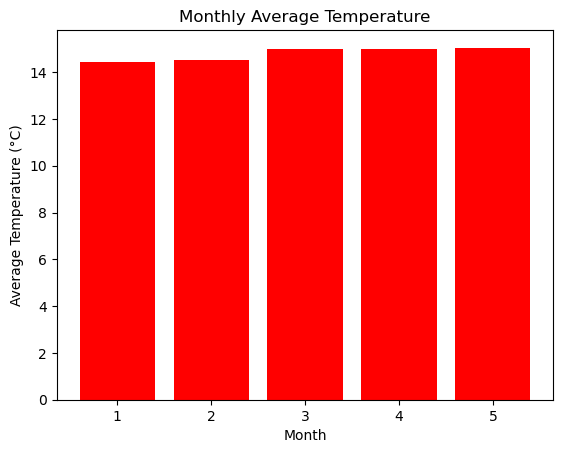

In [38]:
monthly_avg = df.groupby("Month")["Temperature_C"].mean()

plt.bar(monthly_avg.index, monthly_avg.values,color="red")
plt.xlabel("Month")
plt.ylabel("Average Temperature (°C)")
plt.title("Monthly Average Temperature")
plt.show()


In [40]:
Q1 = df["Temperature_C"].quantile(0.25)
Q3 = df["Temperature_C"].quantile(0.75)

IQR = Q3 - Q1

anomalies_iqr = df[
    (df["Temperature_C"] < Q1 - 1.5 * IQR) |
    (df["Temperature_C"] > Q3 + 1.5 * IQR)
]

anomalies_iqr

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh,Month
